# Exploratory Data Analysis

In [1]:
# Import modules

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler

In [2]:
# Configurations

np.random.seed(1)
pd.set_option('display.max_columns', None)

In [3]:
# Global variables

DATASETS_PATH = '../datasets'

In [4]:
# Load data

with open(f'{DATASETS_PATH}/Turbofan Engines/processed/cases.pkl', 'rb') as file:
    cases = pickle.load(file)

print(f'number of cases: {len(cases)}')

number of cases: 709


In [5]:
# Merge cases

merged_cases = pd.DataFrame()
for case in cases:
    merged_cases = pd.concat(
        [merged_cases, case]
    )

print(f'merged cases shape: {merged_cases.shape}')

merged cases shape: (160359, 24)


In [6]:
# Missing values

print(f'number of missing values: {merged_cases.isna().sum().sum()}')

number of missing values: 0


In [7]:
# Describe

merged_cases.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,14.424935,359.729968,2273.829707,8677.553696,1.153705,44.212049,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700
std,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,6.443922,174.133835,142.426613,374.657454,0.142103,3.426342,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067
min,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,5.670000,136.170000,1914.720000,7984.510000,0.930000,36.040000,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500
25%,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,8.000000,175.710000,2212.120000,8334.770000,1.020000,42.010000,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300
50%,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,13.660000,341.690000,2319.370000,8764.200000,1.090000,44.930000,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500
75%,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,21.610000,553.290000,2388.050000,9055.850000,1.300000,47.340000,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600
max,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,21.610000,570.810000,2388.640000,9244.590000,1.320000,48.530000,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500


In [8]:
# Lengths

lengths = []
for case in cases:
    lengths.append(len(case))

pd.DataFrame({'length': lengths}).describe()

,length
count,709.000000
mean,226.176305
std,66.434783
min,128.000000
25%,181.000000
50%,207.000000
75%,259.000000
max,543.000000


In [9]:
# Select random cases

random_numbers = np.random.randint(0, len(cases), size=3)

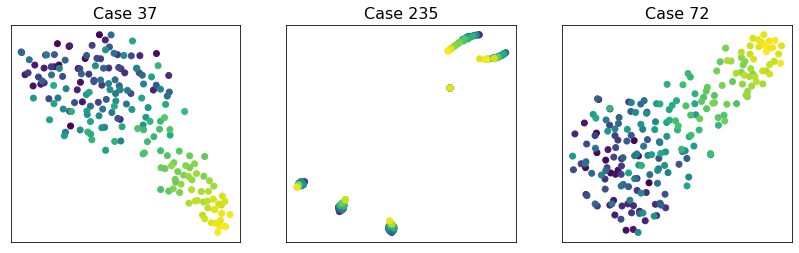

In [11]:
# Visualize

_, ax = plt.subplots(ncols=3, figsize=(14, 4))

for i, number in enumerate(random_numbers):

    data = cases[number]

    data_norm = RobustScaler().fit_transform(data)
    data_pca = TSNE(n_components=2).fit_transform(data_norm)

    ax[i].scatter(data_pca[:, 0], data_pca[:, 1], c=range(len(data)))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(f'Case {number}', size=16)

plt.show()